In [1]:
import tensorflow as tf
import tensorflow_hub as hub

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [4]:
import pathlib
data_train = 'D:/07 Skripsi/datates/train'
data_test = 'D:/07 Skripsi/datates/test'

In [5]:
#preprocessing data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
train_generator = train_datagen.flow_from_directory(
            data_train,
            target_size=(150,150),
            class_mode='categorical',
            batch_size=16)
test_generator = test_datagen.flow_from_directory(
            data_test,
            target_size=(150,150),
            class_mode='categorical',
            batch_size=15)

Found 372 images belonging to 6 classes.
Found 300 images belonging to 6 classes.


In [14]:
base_model = ResNet50(input_shape = (150,150,3),
                  include_top=False,
                  weights=None)

In [16]:
for layer in base_model.layers:
    layer.trainable=False

In [17]:
from tensorflow.keras import Model
from tensorflow.keras import layers

In [18]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(128, activation = 'relu')(x)
x = layers.Dense(6, activation = 'softmax')(x)

model = Model (base_model.input,x)

In [19]:
model.compile(optimizer = 'Adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [20]:
history = model.fit(
        train_generator,
        epochs = 100,
        steps_per_epoch=23,
        validation_data = test_generator,
        verbose = 1,
        validation_steps=20)

Epoch 1/100
23/23 [==============================] - 146s 6s/step - loss: 1.9640 - accuracy: 0.1685 - val_loss: 1.7669 - val_accuracy: 0.1867
Epoch 2/100
23/23 [==============================] - 144s 6s/step - loss: 1.6547 - accuracy: 0.3539 - val_loss: 1.6870 - val_accuracy: 0.2500
Epoch 3/100
23/23 [==============================] - 129s 6s/step - loss: 1.5512 - accuracy: 0.3652 - val_loss: 1.6538 - val_accuracy: 0.3400
Epoch 4/100
23/23 [==============================] - 135s 6s/step - loss: 1.4494 - accuracy: 0.4213 - val_loss: 1.5923 - val_accuracy: 0.4233
Epoch 5/100
23/23 [==============================] - 128s 6s/step - loss: 1.4106 - accuracy: 0.4522 - val_loss: 1.4575 - val_accuracy: 0.4333
Epoch 6/100
23/23 [==============================] - 137s 6s/step - loss: 1.3314 - accuracy: 0.4691 - val_loss: 1.4279 - val_accuracy: 0.4700
Epoch 7/100
23/23 [==============================] - 132s 6s/step - loss: 1.3317 - accuracy: 0.4579 - val_loss: 1.5227 - val_accuracy: 0.3500
Epoch 

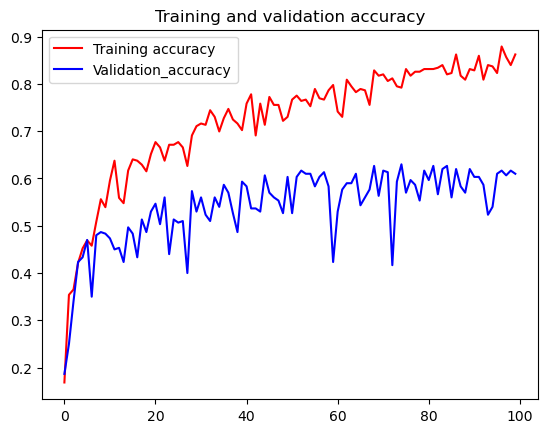

<Figure size 640x480 with 0 Axes>

In [21]:
#plot the result 
 
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation_accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
1